In [52]:
import pandas as pd

data = pd.read_csv('data/wine_cleared.csv')

In [19]:
data['price_round'] = data['price'].round().astype(int)

In [20]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)
data['year'] = pd.to_numeric(data['year'])

In [21]:
data['country'].value_counts()


US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [22]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [23]:
data['old_wine'] = data['year'].apply(lambda x: 1 if x < 2010 else 0)

In [24]:
data['old_wine'].sum()

39781

In [25]:
regex = '.*?\(([^)]*)\).*' # регулярное выражение для поиска текста между двух скобок
data['locality'] = data['title'].str.findall('.*?\(([^)]*)\).*').str.get(0)

### Работа с файлами

In [26]:
country_population = pd.read_csv('data/country_population.csv', sep=';')

In [27]:
country_population[country_population['country'] == 'Italy']

,country,population
24,Italy,"59,097,904"


In [28]:
data = data.join(country_population.set_index('country'), on='country')

In [29]:
country_area = pd.read_csv('data/country_area.csv', sep=';')

In [30]:
data = data.join(country_area.set_index('country'), on='country')

Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'? Ответ вводите без пробелов, округлите до целых.

In [31]:
round(data[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']['area'],0)

94    9372610.0
Name: area, dtype: float64

In [32]:
data.to_csv('data/wine_edited.csv', sep='\t')

#### Нормализуйте признак price. Выберите подходящий тип нормализации, учитывая тот факт, что в данных присутствуют вина с выбросной стоимостью.

In [76]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px 

In [63]:
data = pd.read_csv('data/wine_cleared_.csv')
#data

In [55]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

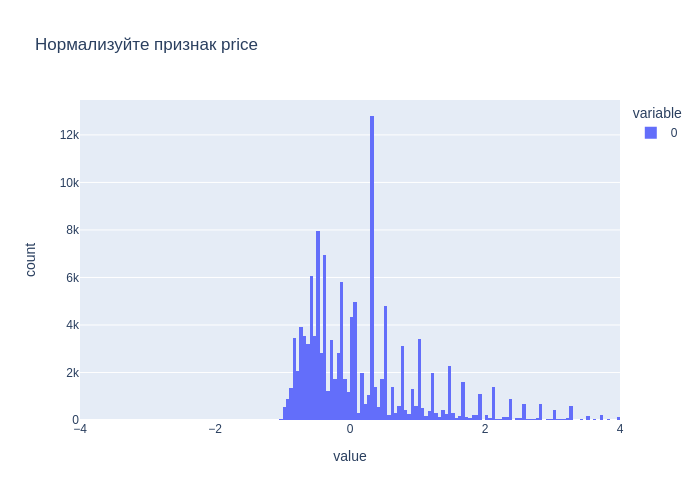

In [83]:
# кодируем исходный датасет
df_r = r_scaler.fit_transform(np.array(data['price']).reshape(-1,1))

fig = px.histogram(
    data_frame=df_r,
    title='Нормализуйте признак price'
)
fig.update(layout_xaxis_range = [-4,4])

fig.show("png")

In [72]:
round(df_r.sum(),0)

43501.0

#### Стандартизируйте исходный признак price.

In [84]:
data = pd.read_csv('data/wine_cleared_.csv')

In [85]:
s_scaler = preprocessing.StandardScaler()

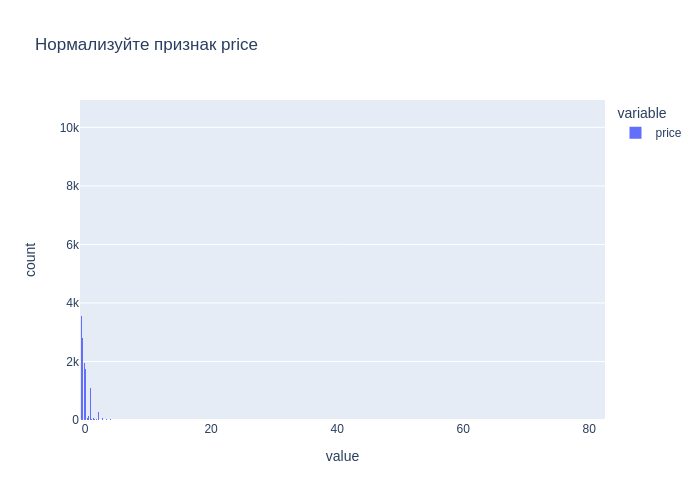

In [98]:
# кодируем исходный датасет
data['price'] = s_scaler.fit_transform(pd.DataFrame(data['price']))

fig = px.histogram(
    data_frame=data['price'],
    title='Нормализуйте признак price'
)
#fig.update(layout_xaxis_range = [-4,4])

fig.show("png")

In [101]:
round(data['price'][129968],2)

-0.14